In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import math 
import astropy
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.stats as sps

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
#SciServer Modules
import SciServer
from SciServer import CasJobs

In [3]:
AGNIDs_DF = pd.read_excel('Massive_AGN_ID.xlsx')
AGNIDs = pd.DataFrame(AGNIDs_DF)
AGNIDs = AGNIDs.values.tolist()

AGNID = []

for i in range(len(AGNIDs)):
    AGNID.append(AGNIDs[i])
    
print('Target number of AGN Galaxies: ' + str(len(AGNID)) + '\n')
print('MaNGA IDs: ' + str(AGNID))

Target number of AGN Galaxies: 4312

MaNGA IDs: [['1-382273'], ['1-382697'], ['1-351913'], ['1-352063'], ['1-352403'], ['1-232167'], ['1-280180'], ['1-3087'], ['1-301609'], ['1-197677'], ['1-320614'], ['1-244998'], ['1-24041'], ['1-23647'], ['1-122595'], ['1-270170'], ['1-543686'], ['1-591782'], ['1-175853'], ['1-70386'], ['1-14039'], ['1-13738'], ['1-200530'], ['1-195761'], ['1-195268'], ['1-497670'], ['1-560607'], ['1-35523'], ['1-108765'], ['1-32786'], ['1-563951'], ['1-41597'], ['1-339092'], ['1-44487'], ['1-383171'], ['1-380300'], ['1-61633'], ['1-79751'], ['1-389513'], ['1-606057'], ['1-301461'], ['1-245301'], ['1-23938'], ['1-153995'], ['1-272795'], ['1-272795'], ['1-269904'], ['1-55170'], ['1-14136'], ['1-82717'], ['1-70173'], ['1-210864'], ['1-211277'], ['1-337227'], ['1-594681'], ['1-40697'], ['1-601919'], ['1-409435'], ['1-2469'], ['1-2921'], ['1-419023'], ['1-107841'], ['1-191503'], ['1-179747'], ['1-180537'], ['1-180497'], ['1-113343'], ['1-37213'], ['1-36903'], ['1-603795

In [4]:
Properties = """select drp.MaNGAid,
                drp.z,
                drp.nsa_elpetro_mass as GalMass,
                dap.ha_gsigma_1re as Ha_VelDisp,
                dap.nsa_sersic_th50 as Distance,
                
                dap.daptype from mangaDRPall as drp
                JOIN mangaDAPall as dap on dap.mangaid = drp.mangaid
                WHERE (drp.z < 0.15) and (drp.z > 0.001)
                and dap.daptype = 'HYB10-MILESHC-MASTARHC2'
                and (drp.nsa_elpetro_mass > 5e+9)"""

Selection1 = CasJobs.executeQuery(Properties, 'dr17')
print(Selection1)

MaNGAIDs_raw = Selection1['MaNGAid']
GalMass_raw = Selection1['GalMass']
Radius_raw = Selection1['Distance']
Ha_VelDisp_raw = Selection1['Ha_VelDisp']

       MaNGAid         z       GalMass  Ha_VelDisp  Distance  \
0     1-458676  0.050341  1.801320e+10   276.97380   1.64735   
1     1-604851  0.028309  1.112120e+10    23.50123  15.55880   
2     1-380032  0.027189  2.067280e+10   110.90510   8.91762   
3     1-352102  0.070850  2.416800e+10    46.08303   6.28345   
4     1-548340  0.098655  1.416390e+11   407.76950   7.65850   
...        ...       ...           ...         ...       ...   
7191  1-605504  0.027650  1.782970e+10    71.40330  11.08140   
7192  1-457602  0.024112  1.343040e+10   118.90610   5.85811   
7193  1-436646  0.068241  4.659870e+10   169.81480   5.58635   
7194  1-295070  0.037690  4.355590e+10   165.48270  11.05500   
7195  1-325913  0.031347  1.635450e+10    90.65745   6.21126   

                      daptype  
0     HYB10-MILESHC-MASTARHC2  
1     HYB10-MILESHC-MASTARHC2  
2     HYB10-MILESHC-MASTARHC2  
3     HYB10-MILESHC-MASTARHC2  
4     HYB10-MILESHC-MASTARHC2  
...                       ...  
7191  H

In [5]:
MaNGAIDs = []
GalMass = []
Radius = []

Ha_VelDisp = []

for i in range(len(MaNGAIDs_raw)):
    MaNGAIDs.append([MaNGAIDs_raw[i]])

for i in range(len(GalMass_raw)):
    GalMass.append([GalMass_raw[i]])
    
for i in range(len(Radius_raw)):
    Radius.append([Radius_raw[i]])
    
for i in range(len(Ha_VelDisp_raw)):
    Ha_VelDisp.append([Ha_VelDisp_raw[i]])
    
print('No. of MaNGA IDs: ' + str(len(MaNGAIDs)))
print('No. of Galaxy Mass Values: ' + str(len(GalMass)))
print('No. of Radius Values: ' + str(len(Radius)))
print('No. of Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp)))

No. of MaNGA IDs: 7196
No. of Galaxy Mass Values: 7196
No. of Radius Values: 7196
No. of Ha Velocity Dispersion Values: 7196


In [6]:
GalIDs_fin = []
GalMass_fin = []
Radius_fin = []

Ha_VelDisp_fin = []

for i in range(len(AGNID)):
    for x in range(len(MaNGAIDs)):
        if (AGNID[i] == MaNGAIDs[x]):
            GalIDs_fin.append(MaNGAIDs[x])
            GalMass_fin.append(GalMass[x])
            Radius_fin.append(Radius[x])
            Ha_VelDisp_fin.append(Ha_VelDisp[x])
            break

print('Galaxies: ' + str(len(GalIDs_fin)))
print('Galaxy Mass Values: ' + str(len(GalMass_fin)))
print('Radius Values: ' + str(len(Radius_fin)) + '\n')
print('Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp_fin)))

Galaxies: 4312
Galaxy Mass Values: 4312
Radius Values: 4312

Ha Velocity Dispersion Values: 4312


In [7]:
#Removing brackets from each element
for i in range(len(Ha_VelDisp_fin)):
    Ha_VelDisp_fin[i] = str(Ha_VelDisp_fin[i])[1:]
    Ha_VelDisp_fin[i] = str(Ha_VelDisp_fin[i])[:-1]
    
for i in range(len(Radius_fin)):
    Radius_fin[i] = str(Radius_fin[i])[1:]
    Radius_fin[i] = str(Radius_fin[i])[:-1]

In [8]:
#Merging values into a 2D array to select points graphed
PltPts2D = np.array(list(zip(Ha_VelDisp_fin, Radius_fin)))

print('Length: ' + str(len(PltPts2D)) + '\n')
PltPts2D = pd.DataFrame(PltPts2D)

PltPts2D

Length: 4312



,0,1
0,70.89655,11.8936
1,102.1289,3.73648
2,350.6341,5.22039
3,117.6516,6.20753
4,58.21873,20.1879
...,...,...
4307,341.3749,6.41937
4308,63.69707,7.5857
4309,35.52847,7.97102
4310,283.974,5.64252


In [9]:
for i in range(4312):
    PltPts2D[0][i] = float(PltPts2D[0][i])
    PltPts2D[1][i] = float(PltPts2D[1][i])
    
print(PltPts2D)

            0         1
0     70.8966   11.8936
1     102.129   3.73648
2     350.634   5.22039
3     117.652   6.20753
4     58.2187   20.1879
...       ...       ...
4307  341.375   6.41937
4308  63.6971    7.5857
4309  35.5285   7.97102
4310  283.974   5.64252
4311  149.421  0.594707

[4312 rows x 2 columns]


In [21]:
#Omitting values less than zero
PltPts2D_Ha =[]
PltPts2D_Rad =[]

for i in range(len(PltPts2D)):
    if((0 < PltPts2D[0][i] < 700) and (0 < PltPts2D[1][i] < 25)):
        PltPts2D_Ha.append(PltPts2D[0][i])
        PltPts2D_Rad.append(PltPts2D[1][i])
        
PltPts2D_z = np.array(list(zip(PltPts2D_Ha, PltPts2D_Rad)))

print('2D Plot Point Array Length: ' + str(len(PltPts2D_z)) + '\n')
print(min(PltPts2D_Rad))
print(max(PltPts2D_Rad))
print(PltPts2D_z)

2D Plot Point Array Length: 4140

0.18004
24.9486
[[ 70.89655   11.8936  ]
 [102.1289     3.73648 ]
 [350.6341     5.22039 ]
 ...
 [ 35.52847    7.97102 ]
 [283.974      5.64252 ]
 [149.4214     0.594707]]


In [11]:
#Finding min and max Ha values
#MinHa = min(PltPts2D_Ha)
#MaxHa = max(PltPts2D_Ha)

#print('Minimum: ' + str(MinHa))
#print('Maximum: ' + str(MaxHa))

In [12]:
#Filtering based on IQR
#OutliersX = []
#OutliersY = []
#PltPtsIQR_Ha =[]
#PltPtsIQR_Rad =[]

#for i in range(len(PltPts2D_z)):
    #if(((abs(PltPts2D_z[i][0]) - MinHa) < RNG) or ((abs(PltPts2D_z[i][1]) - MaxHa) > RNG)):
        #OutliersX.append(PltPts2D_z[i][0])
        #OutliersY.append(PltPts2D_z[i][1])
    #else:
        #PltPtsIQR_Ha.append(PltPts2D_z[i][0])
        #PltPtsIQR_Rad.append(PltPts2D_z[i][1])
        
#PltPts2D_fin = np.array(list(zip(PltPtsIQR_Ha, PltPtsIQR_Rad)))

#print('2D Plot Point Array Length: ' + str(len(PltPts2D_fin)) + '\n')
#print(PltPts2D_fin)

In [22]:
#Splitting elements back into two lists for plotting
Ha_VelDisp_plt = []
GalMass_plt = []

for i in range(len(PltPts2D_z)):
    Ha_VelDisp_plt.append([PltPts2D_z[i][0]])
    GalMass_plt.append([PltPts2D_z[i][1]])
    
print('Ha Velocity Dispersion Values: ' + str(len(Ha_VelDisp_plt)))
print('Radius Values: ' + str(len(GalMass_plt)))

print(Ha_VelDisp_plt)
print(GalMass_plt)

Ha Velocity Dispersion Values: 4140
Radius Values: 4140
[[70.89655], [102.1289], [350.6341], [117.6516], [58.21873], [70.65643], [116.6879], [490.3543], [123.0342], [297.2819], [55.74693], [539.7521], [167.2669], [353.8392], [120.0708], [510.3689], [126.7179], [89.71492], [343.6525], [178.8405], [97.96394], [229.367], [88.25994], [183.5815], [158.103], [259.6918], [346.609], [82.92577], [77.87363], [184.476], [626.1407], [447.6828], [52.65121], [105.296], [39.39879], [400.8497], [89.77892], [124.7713], [344.9776], [140.2584], [526.1371], [525.4423], [514.0389], [514.0389], [385.7165], [112.3574], [342.6483], [341.7549], [75.87022], [22.97326], [147.5316], [102.6006], [288.3437], [77.15764], [290.7676], [194.5442], [360.7689], [132.1571], [99.57448], [85.67241], [99.40628], [61.87477], [358.7884], [317.8108], [39.89122], [534.8696], [99.61083], [359.8337], [105.48], [422.8767], [422.9642], [114.0898], [241.785], [62.29644], [415.4294], [405.9338], [348.9044], [74.52467], [416.2589], [27

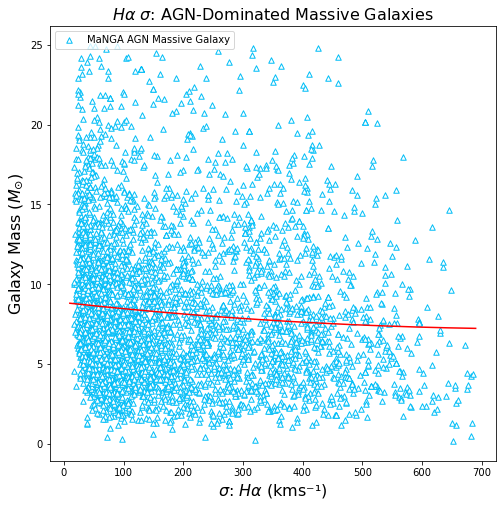

In [26]:
plt.figure(figsize = (8, 8))
plt.title('$H{\u03B1}$ ${\u03C3}$: AGN-Dominated Massive Galaxies', fontsize = 16)

plt.scatter(Ha_VelDisp_plt, 
            GalMass_plt, 
            color = 'white', 
            edgecolor = '#02bef7', 
            marker = '^', 
            alpha = 1, 
            s = 30, 
            label = "MaNGA AGN Massive Galaxy")

plt.xlabel('${\u03C3}$: $H{\u03B1}$ (kms\u207B\u00B9)', fontsize = 16)
plt.ylabel('Galaxy Mass ($M_{\odot}$)', fontsize = 16)
#plt.xlim(0,700)
#plt.ylim(0, 25)

#Regression Line
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(Ha_VelDisp_plt)

Reg = LinearRegression()
Reg.fit(X_poly, GalMass_plt)

XValues_lin = np.linspace(10, 690, 4140).reshape(-1, 1)
XValues_poly = poly_features.transform(XValues_lin)

YValues = Reg.predict(XValues_poly)

plt.plot(XValues_lin, YValues, c ='red')
legend = plt.legend(loc = 'upper left')
plt.savefig('Ha Velocity Dispersion: Massive AGN', dpi = 600, bbox_inches = 'tight')
plt.show()

In [15]:
#Calculating p-value
mod = sm.OLS(GalMass_plt, Ha_VelDisp_plt)
fii = mod.fit()
p_value = fii.summary2().tables[1]['P>|t|']

print(p_value)
#p < .0001

x1    1.764101e-278
Name: P>|t|, dtype: float64


In [29]:
#Calculating r-value
r2 = r2_score(GalMass_plt, YValues)
r = -1 * (np.sqrt(abs(r2)))
print('r = ' + str(r))

r = -0.14144472885585196
